In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
sns.set(style="darkgrid")

## Get data

In [12]:
dossier = '/media/merlin/Media/ScaledTime/MEG/'

fichier1 = 'eb180237/eb180237_ScaledTime_RS01_filtered_ica_sss_raw.fif'

In [13]:
import mne

In [14]:
raw = mne.io.read_raw_fif(dossier+fichier1)

Opening raw data file /media/merlin/Media/ScaledTime/MEG/eb180237/eb180237_ScaledTime_RS01_filtered_ica_sss_raw.fif...
    Range : 490500 ... 1234499 =    245.250 ...   617.250 secs
Ready.
Current compensation grade : 0


In [15]:
fs = raw.info['sfreq']

In [16]:
raw.load_data()

Reading 0 ... 743999  =      0.000 ...   372.000 secs...


<Raw | eb180237_ScaledTime_RS01_filtered_ica_sss_raw.fif, 340 x 744000 (372.0 s), ~1.89 GB, data loaded>

In [17]:
sensor = 'MEG2133'
sensor in raw.ch_names

True

In [18]:
raw.pick_channels([sensor])

<Raw | eb180237_ScaledTime_RS01_filtered_ica_sss_raw.fif, 1 x 744000 (372.0 s), ~12.8 MB, data loaded>

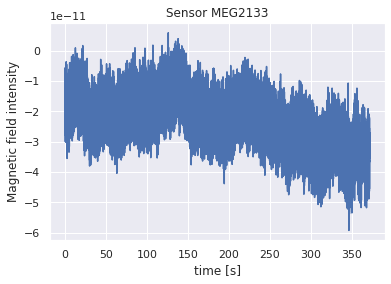

In [19]:
plt.plot(raw[0][1], raw[0][0][0])
plt.title(f'Sensor {sensor}')
plt.xlabel('time [s]')
plt.ylabel('Magnetic field intensity')
plt.show()

In [25]:
data = raw[0][0][0]

In [20]:
import numpy as np

In [23]:
import mfanalysis.mf_analysis as mf

In [21]:
l = np.logspace(np.log10(0.01), np.log10(5), 10)
q = np.array([*-l, *l, 0, 1, 2, -1, -2])
q.sort()

In [22]:
nwt = 2

In [26]:
sf, cum, mfs = mf.mf_analysis_full(data,
    wt_name=f'db{nwt}',
    j1=9, j2=12,
    q=q,
    n_cumul=3,
    gamint=1/2,
    weighted=False,
    p_exp=2
)

In [28]:
import mfanalysis.signal as sig

In [29]:
S = sig.Signal(data, fs)

In [30]:
sf, cum, mfs = S.mf_analysis_full(j1=10, j2=14,
    wt_name=f'db{nwt}',
    q=q,
    n_cumul=3,
    gamint=1/2,
    weighted=False,
    p_exp=2)

In [31]:
S.hurst()

(0.7458452349960716,
 array([-78.40912315, -75.97964551, -75.60118956, -75.33914807,
        -74.84455868, -73.67387193, -72.59304274, -72.74077209,
        -72.26112549, -71.35303745, -70.05788861, -68.49464709,
        -66.8834455 , -65.48180665, -64.36185146, -62.67764602,
        -61.45339634]))

In [32]:
S.hmin()

(0.6643832375712002, -40.47579544369106)

In [34]:
S.data.size

744000

In [35]:
S

Signal(data=array([-1.75522905e-11, -1.52585266e-11, -1.67093211e-11, ...,
       -2.69856119e-11, -2.87659596e-11, -2.97298708e-11]), fs=2000.0, log='log2', wt_psd_param=None, wt_psd=None, welch_param=None, welch_psd=None, fractal_param=None, fractal=None, wt_param=WaveletParameters(j1=10, j2=14, normalization=1, gamint=0.5, weighted=False, wt_name='db2', p_exp=2), mf_param=MFParameters(q=array([-5.        , -2.50659661, -2.        , -1.25660531, -1.        ,
       -0.62996052, -0.31581138, -0.15832235, -0.07937005, -0.03978974,
       -0.01994737, -0.01      ,  0.        ,  0.01      ,  0.01994737,
        0.03978974,  0.07937005,  0.15832235,  0.31581138,  0.62996052,
        1.        ,  1.25660531,  2.        ,  2.50659661,  5.        ]), n_cumul=3), multi_fractal=MFractalData(structure=<mfanalysis.structurefunction.StructureFunction object at 0x7f2544aa99d0>, cumulants=<mfanalysis.cumulants.Cumulants object at 0x7f2544aa9ed0>, spectrum=<mfanalysis.mfspectrum.MultifractalSpectrum

In [41]:
S.mf_param.q.size

25

In [43]:
S.multi_fractal.structure

In [44]:
S.multi_fractal.cumulants

In [50]:
cum.mrq.values[1].size

371997

In [52]:
cum.nj

{1: 371997,
 2: 185996,
 3: 92996,
 4: 46496,
 5: 23246,
 6: 11621,
 7: 5808,
 8: 2902,
 9: 1449,
 10: 722,
 11: 359,
 12: 177,
 13: 86,
 14: 41,
 15: 18,
 16: 7,
 17: 1}

In [53]:
cum.n_cumul

3

In [59]:
cum.values.size

51

In [60]:
cum.log_cumulants

array([6.11314580e-01, 8.00235125e-03, 3.56875715e-04])

In [61]:
cum.var_log_cumulants

array([0.2081369, 0.2081369, 0.2081369])

In [62]:
cum.values

array([[-2.69279572e+01, -2.60054600e+01, -2.55991346e+01,
        -2.53421326e+01, -2.51208555e+01, -2.48405975e+01,
        -2.45270465e+01, -2.43266749e+01, -2.41387070e+01,
        -2.39188770e+01, -2.36202165e+01, -2.32113751e+01,
        -2.27041379e+01, -2.22582614e+01, -2.18411570e+01,
        -2.13294063e+01, -2.07565108e+01],
       [ 3.71097417e-01,  1.72610482e-01,  7.66818384e-02,
         4.52192791e-02,  3.38023477e-02,  4.23292187e-02,
         5.66883002e-02,  4.03933831e-02,  3.01140637e-02,
         3.05522010e-02,  4.42296149e-02,  6.63964859e-02,
         6.73891042e-02,  4.67064924e-02,  5.07660881e-02,
         9.31248562e-02,  0.00000000e+00],
       [-1.35487942e-01, -2.92191882e-02, -3.75898831e-03,
         7.23054407e-04,  2.46381195e-03,  4.50132562e-03,
         7.04782304e-03,  2.52192070e-03,  9.55615564e-04,
         2.47822502e-03,  4.02880252e-03,  8.02121532e-03,
        -1.53679089e-03,  6.49785870e-03, -2.73666815e-03,
        -1.76761618e-02,  0.0

In [65]:
sf.mrq.values[1].size

371997

In [70]:
sf.q

array([-5.        , -2.50659661, -2.        , -1.25660531, -1.        ,
       -0.62996052, -0.31581138, -0.15832235, -0.07937005, -0.03978974,
       -0.01994737, -0.01      ,  0.        ,  0.01      ,  0.01994737,
        0.03978974,  0.07937005,  0.15832235,  0.31581138,  0.62996052,
        1.        ,  1.25660531,  2.        ,  2.50659661,  5.        ])

In [71]:
sf.zeta

array([-2.95335612, -1.5070504 , -1.20663281, -0.76190009, -0.60733928,
       -0.38352551, -0.19266255, -0.09668468, -0.04849489, -0.02431772,
       -0.01219252, -0.00611275,  0.        ,  0.00611355,  0.01219571,
        0.02433039,  0.04854531,  0.09688531,  0.19346143,  0.38671311,
        0.61541658,  0.77472223,  1.23980998,  1.56014512,  3.18729131])

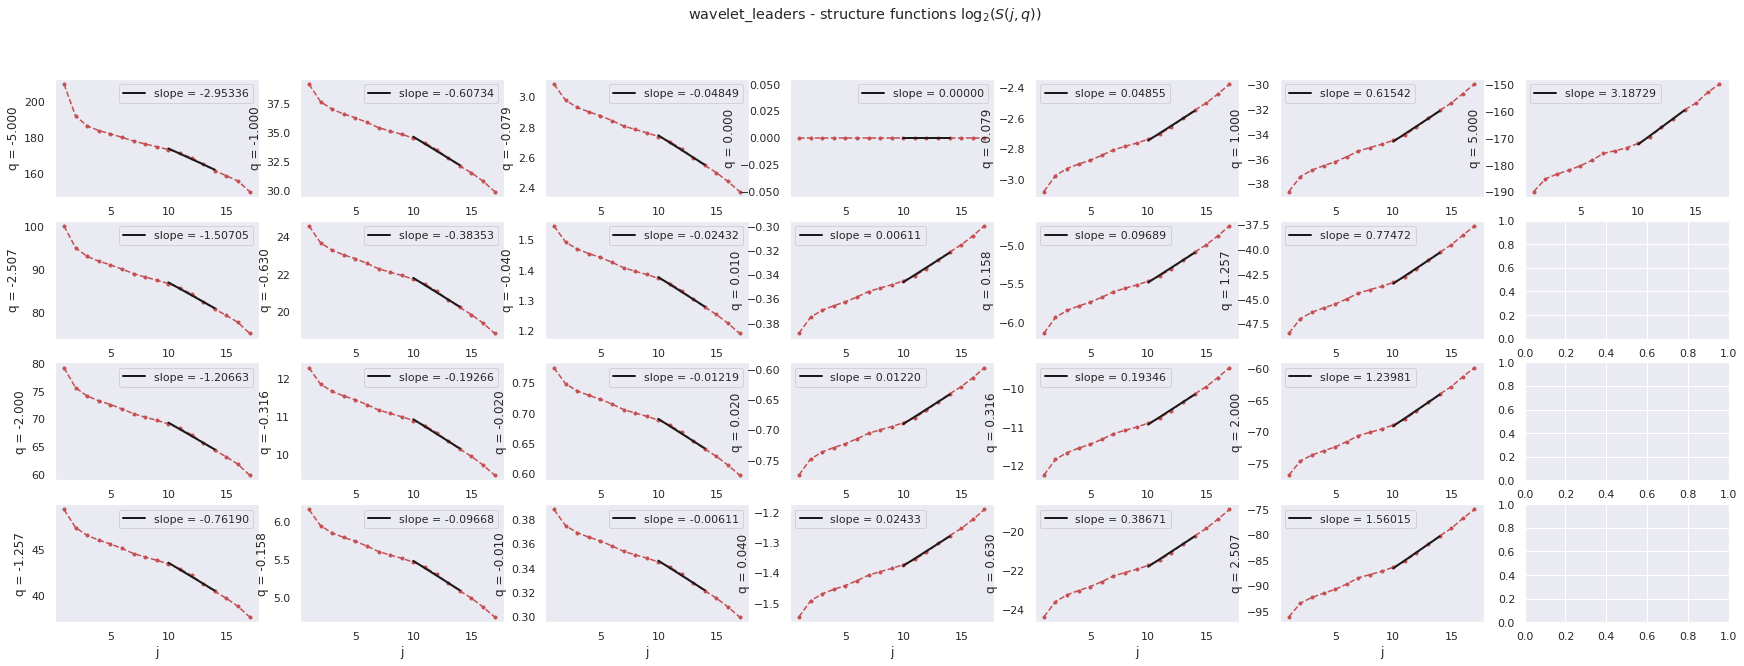

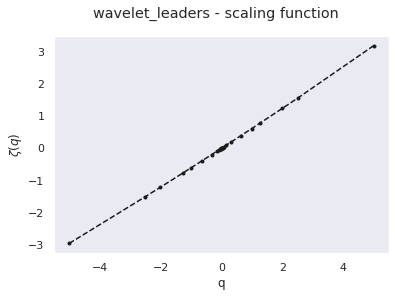

In [72]:
sf.plot()

In [82]:
d1 = {1: 2, 3: 4, 5: 6}

In [84]:
d2 = {6: 7}

In [87]:
{**{}, 6: 7}

{1: 2, 3: 4, 5: 6, 6: 7}

In [78]:
sf.zeta[sf.q == 2]

array([1.23980998])

In [76]:
sf.logvalues[sf.q == 2]

array([[-76.82415513, -74.58794168, -73.64866876, -72.98943576,
        -72.37870379, -71.54243199, -70.5918063 , -70.06987956,
        -69.56081726, -68.92157451, -68.01882606, -66.76465326,
        -65.31988999, -64.07199263, -62.88051018, -61.31491992,
        -59.89063041]])

In [96]:
filename = 'sdpkjgldsfkjhdl;h.fif'

In [97]:
filename[-3:]

'fif'

In [95]:
mfs.wt_param

WaveletParameters(j1=10, j2=14, wtype=False)

In [68]:
sf.values

array([[1.12896212e+63, 5.11627892e+57, 1.12868978e+56, 1.87072024e+55,
        5.24211722e+54, 1.37793162e+54, 3.28285365e+53, 1.05644095e+53,
        3.72818659e+52, 1.22456986e+52, 3.11862969e+51, 5.08641494e+50,
        4.60627927e+49, 3.61448502e+48, 5.08151907e+47, 6.68202245e+46,
        1.18083858e+45],
       [1.31888216e+30, 3.82364916e+28, 9.48293405e+27, 4.45248564e+27,
        2.45852583e+27, 1.24406201e+27, 5.89269405e+26, 3.42391500e+26,
        2.07701383e+26, 1.19504656e+26, 5.86955127e+25, 2.24226507e+25,
        6.43400545e+24, 1.94585144e+24, 7.03617575e+23, 2.27195485e+23,
        3.94057880e+22],
       [6.92544645e+23, 5.70993621e+22, 2.01473609e+22, 1.12425688e+22,
        7.04643770e+21, 4.08069407e+21, 2.23574428e+21, 1.45751430e+21,
        9.82261273e+20, 6.32336574e+20, 3.56676664e+20, 1.63957962e+20,
        6.02019970e+19, 2.35026509e+19, 1.03783007e+19, 4.10843503e+18,
        1.06875021e+18],
       [7.05219244e+14, 1.80218054e+14, 9.93728839e+13, 7.007

In [67]:
sf.logvalues

array([[ 209.45646706,  191.70499633,  186.20262233,  183.60963905,
         181.77426674,  179.84662142,  177.77713947,  176.14140115,
         174.638735  ,  173.03253601,  171.05924509,  168.4430539 ,
         164.97807853,  161.30633867,  158.4758803 ,  155.54897719,
         149.72657603],
       [ 100.05715852,   94.94893681,   92.93739206,   91.84666952,
          90.98985207,   90.00711696,   88.92905783,   88.14577735,
          87.42464129,   86.62719729,   85.60145259,   84.21315921,
          82.41199144,   80.68667585,   79.2191377 ,   77.58828035,
          75.06082564],
       [  79.19625326,   75.59589271,   74.09300896,   73.25138981,
          72.57738409,   71.78930455,   70.92124518,   70.30400004,
          69.73466872,   69.09925456,   68.27317873,   67.15188786,
          65.70644515,   64.34945729,   63.17020404,   61.83329466,
          59.89063041],
       [  49.32506517,   47.35673687,   46.49791747,   45.993932  ,
          45.5790789 ,   45.0797124 ,   44.5

In [51]:
S.multi_fractal.spectrum